In [1]:
# Clear memory
import gc as gc
gc. collect() 

159

In [25]:
import math

import warnings
warnings.filterwarnings("ignore")


#Manipultation and plotting 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, MinMaxScaler


#Modelos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression , LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Feature selection
from sklearn.feature_selection import mutual_info_regression


#Regularizacion
from sklearn.linear_model import Ridge,Lasso,ElasticNet

#Metricas
from sklearn.metrics import r2_score , confusion_matrix , accuracy_score, plot_confusion_matrix, SCORERS

from sklearn.model_selection import KFold, cross_val_score


In [3]:
df = pd.read_csv('C:\desarrollo\proyectos\datasets\Credit_risk\original.csv')

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  1997 non-null   int64  
 1   income    1997 non-null   float64
 2   age       1997 non-null   float64
 3   loan      1997 non-null   float64
 4   default   1997 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 93.6 KB


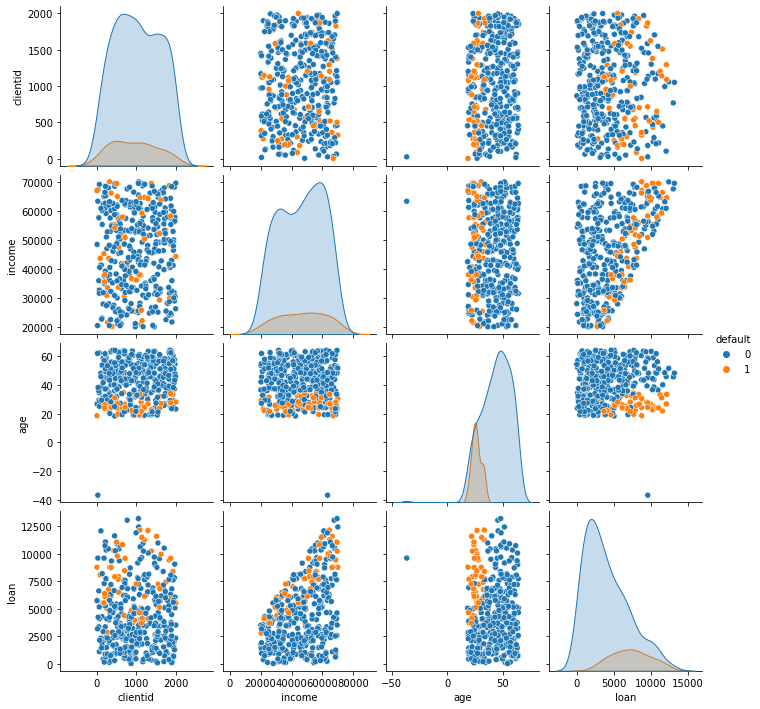

In [5]:
sns.pairplot(df.sample(400), hue='default')

<AxesSubplot:>

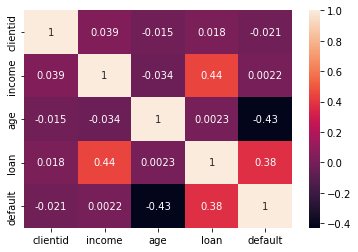

In [6]:
corr = df.corr()

sns.heatmap(corr,annot=True)


In [7]:
# clean outliers

df = df[df.age > 0]

y = df.default
df = df.drop(columns=['clientid','default'])

In [8]:
#Feature importance

mi_scores = mutual_info_regression(df, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=df.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

age       0.151793
loan      0.085567
income    0.000996
Name: MI Scores, dtype: float64

In [9]:
#Scaling Data
scaler = MinMaxScaler(feature_range=(0, 1))

df_scale = pd.DataFrame(scaler.fit_transform(df.copy()),columns=df.columns)

In [10]:
df_scale.head()

df_scale.describe()

,income,age,loan
count,1994.000000,1994.000000,1994.000000
mean,0.506478,0.498132,0.322700
std,0.286643,0.289041,0.221355
min,0.000000,0.000000,0.000000
25%,0.256053,0.239305,0.140420
50%,0.515623,0.508040,0.288440
75%,0.755635,0.752706,0.467622
max,1.000000,1.000000,1.000000


In [11]:
X_train , X_test , y_train , y_test = train_test_split(df_scale,y,test_size=0.3, random_state=42)

In [12]:
reg = LogisticRegressionCV(cv=5, random_state=42)

reg.fit(X_train,y_train)

pred = reg.predict(X_test)

score = accuracy_score(y_test,pred)

print(f'score Logistic Regression : {score}')

score Logistic Regression : 0.9465776293823038


<AxesSubplot:xlabel='Variable', ylabel='Value'>

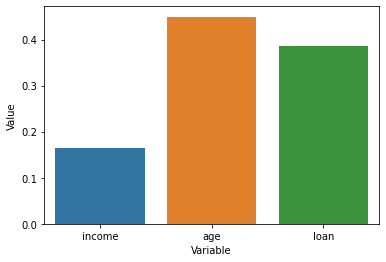

In [26]:
forest = RandomForestClassifier()

forest.fit(X_train,y_train)

result_forest = pd.DataFrame([forest.feature_importances_],columns=X_train.columns,).T

result_forest['Variable'] = result_forest.index

result_forest.reset_index(drop=True)

result_forest.columns = ['Value', 'Variable']

result_forest['Value'].sort_values(ascending = False)

sns.barplot(data=result_forest, x = 'Variable', y='Value')





In [23]:
pred_forest = forest.predict(X_test)

score_forest = accuracy_score(y_test,pred_forest)

score_forest 

0.988313856427379

In [28]:
xgb = XGBClassifier(random_state=42)

space_search = {
                'n_estimators':[100,200,500,700],
                'max_depth' : [3,6,7,8,9],
                'gamma' : [0.01, 0.02, 0.05 , 0.1],
                'learning_rate' : [ 0.001, 0.01, 0.1, 1 ] 
                }

GS = GridSearchCV( estimator = xgb,
                   param_grid= space_search,
                   scoring= 'accuracy',
                   n_jobs = -1,
                   cv=5,
                   verbose = 100)



In [29]:
GS.fit(X_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[16:55:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_me

In [30]:
print(GS.best_estimator_)
print('---------------------------------------------------------------------------------------')
print(GS.best_params_)
print(GS.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.01, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
---------------------------------------------------------------------------------------
{'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
0.9878136200716845


In [31]:
xgb_opt = XGBClassifier(
                        n_estimators= 500,
                        max_depth= 6,
                        gamma= 0.01,
                        learning_rate= 0.01,
                        random_state=42
                        )

xgb_opt.fit(X_train,y_train)

pred_xgb = xgb_opt.predict(X_test)

score_xgb = accuracy_score(y_test,pred_xgb)





[16:55:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
print('Models:')
print(f'Logistic Regression Score (CV): {score:.4%}')
print(f'Random Forest Score : {score_forest :.4%}')
print(f'XGB Score : {score_xgb:.4%}')

Models:
Logistic Regression Score (CV): 94.6578%
Random Forest Score : 98.8314%
XGB Score : 98.8314%


In [23]:
# Random Forest was the best model with an accuracy_score = 98.9983%